In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # to plot charts
import seaborn as sns # used for data visualization
import warnings # avoid warning flash
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r"C:\Users\acacia\Desktop\data mining\diabetes.csv")
print(df.head())
print("===========================================================")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\acacia\\Desktop\\data mining\\diabetes.csv'

In [3]:
# This method prints info about a DataFrame like the index dtype and columns and count , non-null values and memory usage.
print("Data Info:")
print(df.info())
print("===========================================================")


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# this method to get descriptive statistics from the data
print("Data Description:")
print(df.describe())
print("===========================================================")


Data Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000

In [5]:
# dropping the dublicates in the data if any found
df=df.drop_duplicates()
print("Data After Removing Duplicate values: ")
print(df)
print("===========================================================")



Data After Removing Duplicate values: 
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.

In [6]:
# check for missing values, count them and print the sum for every column
print("The number of Null-values in each column: ")
print(df.isnull().sum())
print("===========================================================")


The number of Null-values in each column: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace ,
# also no. of pregnancies as 0 is possible as observed in df.describe
print("Number of Zeros in Blood pressure is ",df[df['BloodPressure']==0].shape[0])
print("Number of Zeros in Glucose is ",df[df['Glucose']==0].shape[0])
print("Number of Zeros in SkinThickness is ",df[df['SkinThickness']==0].shape[0])
print("Number of Zeros in Insulin is ",df[df['Insulin']==0].shape[0])
print("Number of Zeros in BMI is ",df[df['BMI']==0].shape[0])
print("Number of Zeros and Ones in",df['Outcome'].value_counts())
print("===========================================================")


Number of Zeros in Blood pressure is  35
Number of Zeros in Glucose is  5
Number of Zeros in SkinThickness is  227
Number of Zeros in Insulin is  374
Number of Zeros in BMI is  11
Number of Zeros and Ones in 0    500
1    268
Name: Outcome, dtype: int64


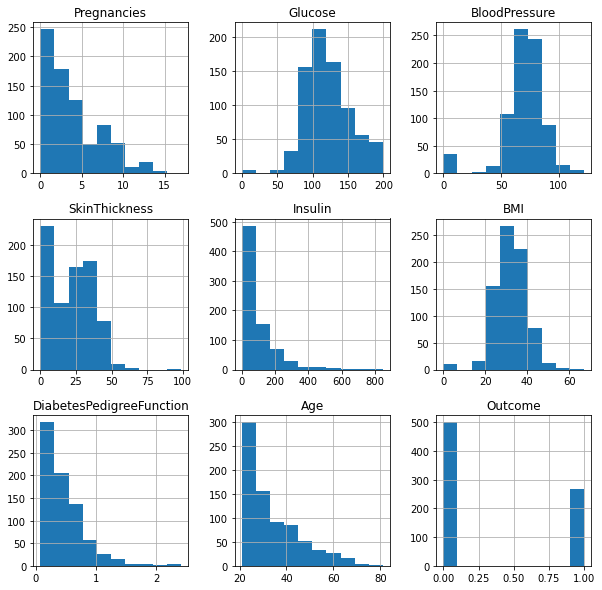

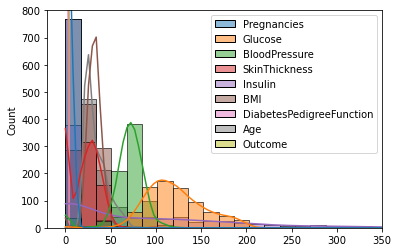

In [8]:
# graph for each column
df.hist(bins=10,figsize=(10,10))
plt.show()

sns.histplot(data=df,bins=50,kde=True)
plt.ylim(0, 800)
plt.xlim(-20,350)
plt.show()



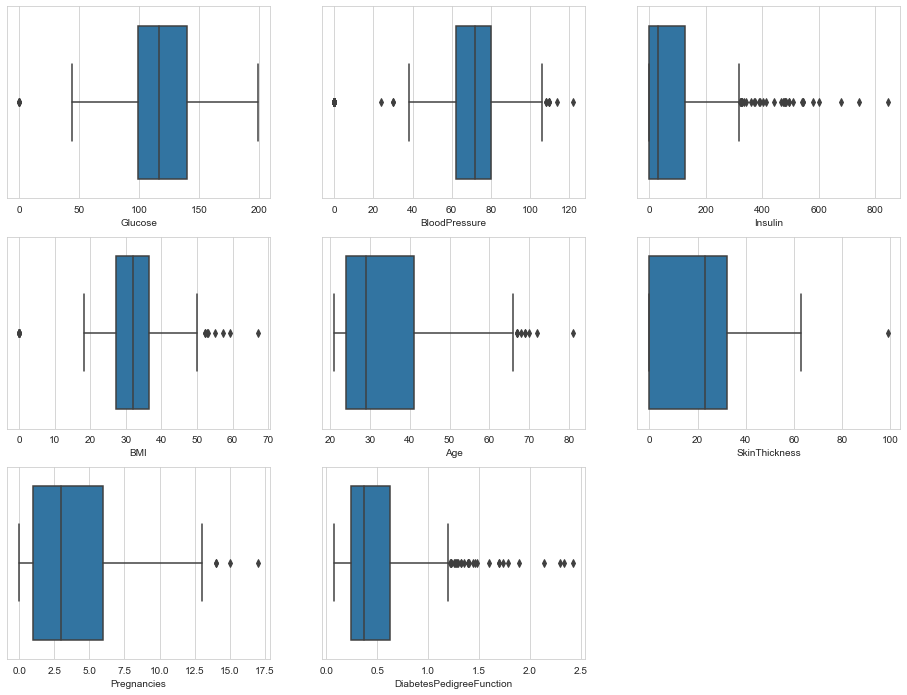

In [9]:
# Another visualization Before handling Outliers
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)
plt.show()



In [10]:
#We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers
# This code is used to replace 0 values in certain columns of a pandas DataFrame with the median or mean of that column,
# depending on the distribution of the data.
print("The Dataset after replacement the zero values: ")
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean()) #normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())# normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median()) # skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median()) # skewed distribution
df['BMI'] = df['BMI'].replace(0,df['BMI'].median()) # skewed distribution
print(df)
print("===========================================================")


The Dataset after replacement the zero values: 
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35     30.5  33.6   
1              1     85.0           66.0             29     30.5  26.6   
2              8    183.0           64.0             23     30.5  23.3   
3              1     89.0           66.0             23     94.0  28.1   
4              0    137.0           40.0             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48    180.0  32.9   
764            2    122.0           70.0             27     30.5  36.8   
765            5    121.0           72.0             23    112.0  26.2   
766            1    126.0           60.0             23     30.5  30.1   
767            1     93.0           70.0             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                

In [11]:
# The data in View of Outcome
print("The Dataset from Outcome View: ")
print(df.groupby('Outcome').mean())
print("===========================================================")
print(df['Outcome'].value_counts())
print("===========================================================")


The Dataset from Outcome View: 
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.705367      70.810008      26.058000   83.188000   
1           4.865672  142.159661      74.950326      29.716418  116.041045   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.880200                  0.429734  31.190000  
1        35.381343                  0.550500  37.067164  
0    500
1    268
Name: Outcome, dtype: int64


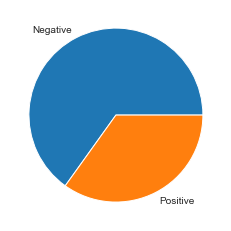

In [12]:
# graph for the outcome
Negative=df[df['Outcome']==0].size
Positive=df[df['Outcome']==1].size
arr=[Negative,Positive]
mylabels = ['Negative','Positive']
plt.pie(arr,labels=mylabels )
plt.show()



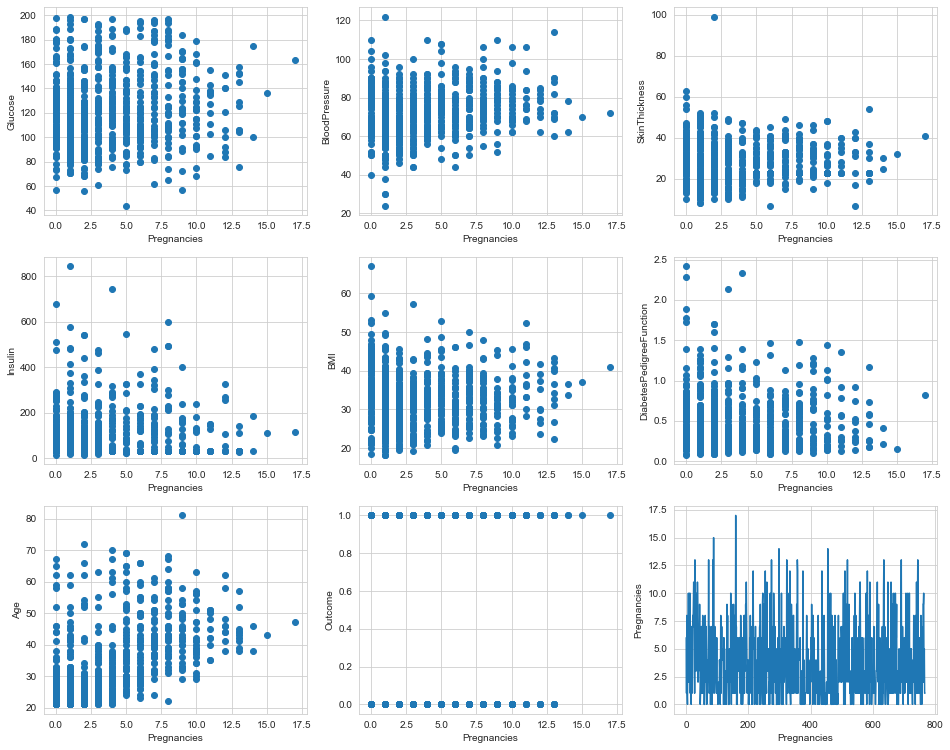

In [13]:
#relation between pregnancies and other columns
figure1, ax =plt.subplots(nrows=3,ncols=3,figsize=(16,13))
ax[0,0].scatter(df['Pregnancies'],df['Glucose'])
ax[0,0].set_xlabel('Pregnancies')
ax[0,0].set_ylabel('Glucose')

ax[0,1].scatter(df['Pregnancies'],df['BloodPressure'])
ax[0,1].set_xlabel('Pregnancies')
ax[0,1].set_ylabel('BloodPressure')

ax[0,2].scatter(df['Pregnancies'],df['SkinThickness'])
ax[0,2].set_xlabel('Pregnancies')
ax[0,2].set_ylabel('SkinThickness')

ax[1,0].scatter(df['Pregnancies'],df['Insulin'])
ax[1,0].set_xlabel('Pregnancies')
ax[1,0].set_ylabel('Insulin')

ax[1,1].scatter(df['Pregnancies'],df['BMI'])
ax[1,1].set_xlabel('Pregnancies')
ax[1,1].set_ylabel('BMI')

ax[1,2].scatter(df['Pregnancies'],df['DiabetesPedigreeFunction'])
ax[1,2].set_xlabel('Pregnancies')
ax[1,2].set_ylabel('DiabetesPedigreeFunction')

ax[2,0].scatter(df['Pregnancies'],df['Age'])
ax[2,0].set_xlabel('Pregnancies')
ax[2,0].set_ylabel('Age')

ax[2,1].scatter(df['Pregnancies'],df['Outcome'])
ax[2,1].set_xlabel('Pregnancies')
ax[2,1].set_ylabel('Outcome')

ax[2,2].plot(df['Pregnancies'])
ax[2,2].set_xlabel('Pregnancies')
ax[2,2].set_ylabel('Pregnancies')
plt.show()


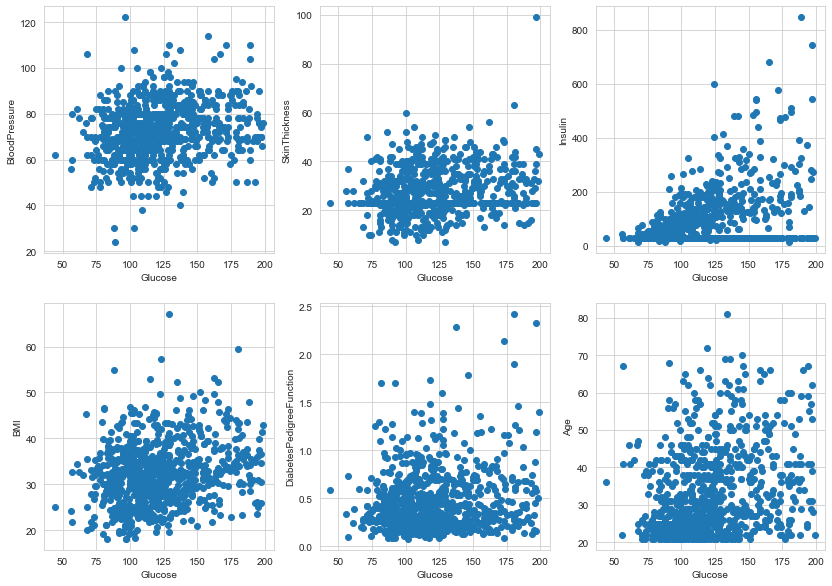

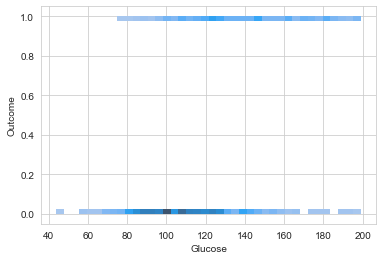

In [14]:
#relation between Glucose and other columns
figure2, ax =plt.subplots(nrows=2,ncols=3,figsize=(14,10))
ax[0,0].scatter(df['Glucose'],df['BloodPressure'])
ax[0,0].set_xlabel('Glucose')
ax[0,0].set_ylabel('BloodPressure')

ax[0,1].scatter(df['Glucose'],df['SkinThickness'])
ax[0,1].set_xlabel('Glucose')
ax[0,1].set_ylabel('SkinThickness')

ax[0,2].scatter(df['Glucose'],df['Insulin'])
ax[0,2].set_xlabel('Glucose')
ax[0,2].set_ylabel('Insulin')

ax[1,0].scatter(df['Glucose'],df['BMI'])
ax[1,0].set_xlabel('Glucose')
ax[1,0].set_ylabel('BMI')

ax[1,1].scatter(df['Glucose'],df['DiabetesPedigreeFunction'])
ax[1,1].set_xlabel('Glucose')
ax[1,1].set_ylabel('DiabetesPedigreeFunction')

ax[1,2].scatter(df['Glucose'],df['Age'])
ax[1,2].set_xlabel('Glucose')
ax[1,2].set_ylabel('Age')
plt.show()

sns.histplot(data=df,x=df['Glucose'],y=df['Outcome'],bins=40)
plt.show()


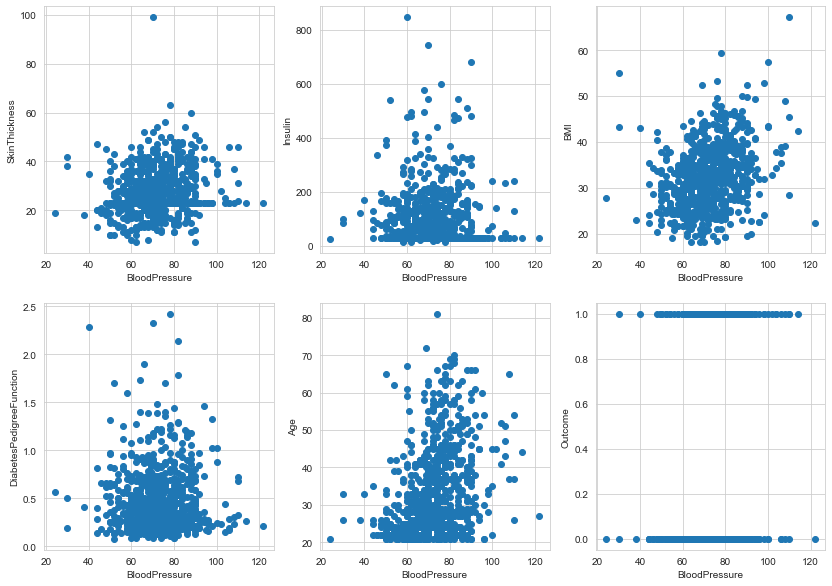

In [15]:
#relation between Blood Pressure and other columns
figure3, ax =plt.subplots(nrows=2,ncols=3,figsize=(14,10))
ax[0,0].scatter(df['BloodPressure'],df['SkinThickness'])
ax[0,0].set_xlabel('BloodPressure')
ax[0,0].set_ylabel('SkinThickness')

ax[0,1].scatter(df['BloodPressure'],df['Insulin'])
ax[0,1].set_xlabel('BloodPressure')
ax[0,1].set_ylabel('Insulin')

ax[0,2].scatter(df['BloodPressure'],df['BMI'])
ax[0,2].set_xlabel('BloodPressure')
ax[0,2].set_ylabel('BMI')

ax[1,0].scatter(df['BloodPressure'],df['DiabetesPedigreeFunction'])
ax[1,0].set_xlabel('BloodPressure')
ax[1,0].set_ylabel('DiabetesPedigreeFunction')

ax[1,1].scatter(df['BloodPressure'],df['Age'])
ax[1,1].set_xlabel('BloodPressure')
ax[1,1].set_ylabel('Age')

ax[1,2].scatter(df['BloodPressure'],df['Outcome'])
ax[1,2].set_xlabel('BloodPressure')
ax[1,2].set_ylabel('Outcome')
plt.show()


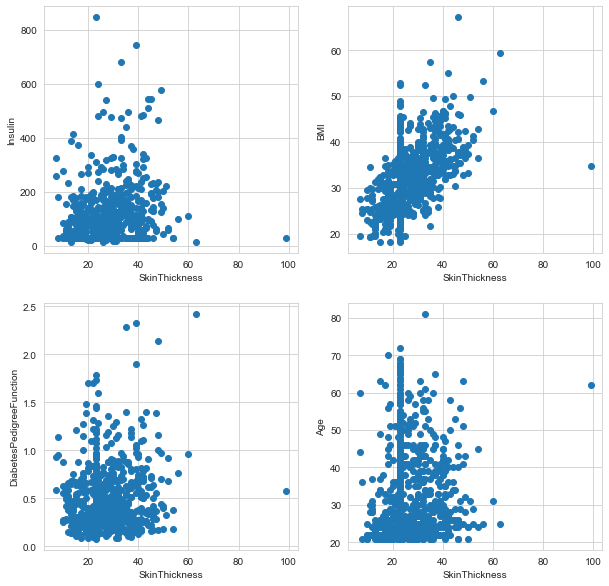

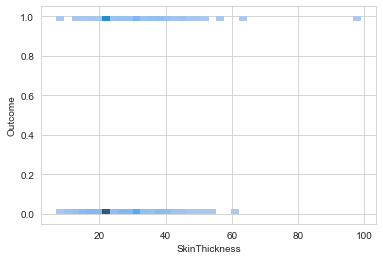

In [16]:
#relation between Skin Thickness and other columns
figure4, ax =plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax[0,0].scatter(df['SkinThickness'],df['Insulin'])
ax[0,0].set_xlabel('SkinThickness')
ax[0,0].set_ylabel('Insulin')

ax[0,1].scatter(df['SkinThickness'],df['BMI'])
ax[0,1].set_xlabel('SkinThickness')
ax[0,1].set_ylabel('BMI')

ax[1,0].scatter(df['SkinThickness'],df['DiabetesPedigreeFunction'])
ax[1,0].set_xlabel('SkinThickness')
ax[1,0].set_ylabel('DiabetesPedigreeFunction')

ax[1,1].scatter(df['SkinThickness'],df['Age'])
ax[1,1].set_xlabel('SkinThickness')
ax[1,1].set_ylabel('Age')
plt.show()

sns.histplot(data=df,x=df['SkinThickness'],y=df['Outcome'],bins=40)
plt.show()



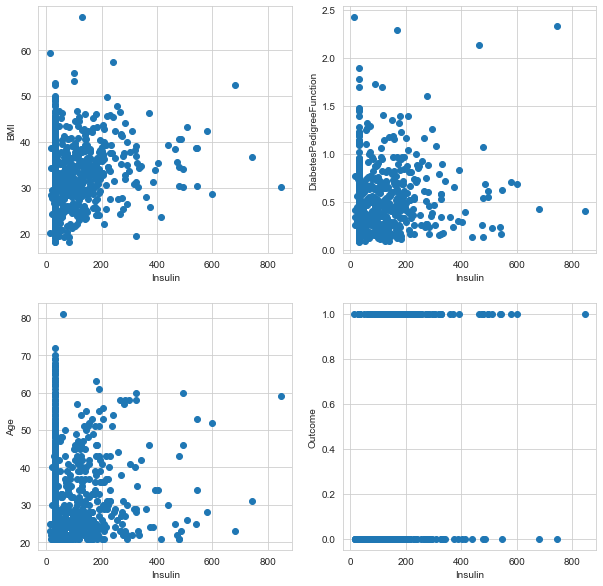

In [17]:
#relation between Insulin and other columns
figure5, ax =plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax[0,0].scatter(df['Insulin'],df['BMI'])
ax[0,0].set_xlabel('Insulin')
ax[0,0].set_ylabel('BMI')

ax[0,1].scatter(df['Insulin'],df['DiabetesPedigreeFunction'])
ax[0,1].set_xlabel('Insulin')
ax[0,1].set_ylabel('DiabetesPedigreeFunction')

ax[1,0].scatter(df['Insulin'],df['Age'])
ax[1,0].set_xlabel('Insulin')
ax[1,0].set_ylabel('Age')

ax[1,1].scatter(df['Insulin'],df['Outcome'])
ax[1,1].set_xlabel('Insulin')
ax[1,1].set_ylabel('Outcome')
plt.show()



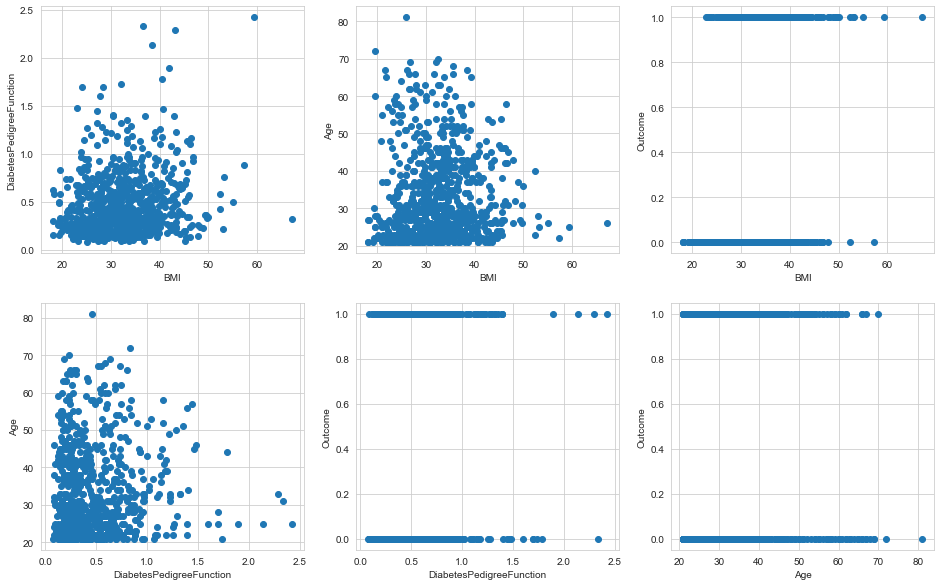

In [18]:
# the last relations between other columns
figure6, ax =plt.subplots(nrows=2,ncols=3,figsize=(16,10))
ax[0,0].scatter(df['BMI'],df['DiabetesPedigreeFunction'])
ax[0,0].set_xlabel('BMI')
ax[0,0].set_ylabel('DiabetesPedigreeFunction')

ax[0,1].scatter(df['BMI'],df['Age'])
ax[0,1].set_xlabel('BMI')
ax[0,1].set_ylabel('Age')

ax[0,2].scatter(df['BMI'],df['Outcome'])
ax[0,2].set_xlabel('BMI')
ax[0,2].set_ylabel('Outcome')

ax[1,0].scatter(df['DiabetesPedigreeFunction'],df['Age'])
ax[1,0].set_xlabel('DiabetesPedigreeFunction')
ax[1,0].set_ylabel('Age')

ax[1,1].scatter(df['DiabetesPedigreeFunction'],df['Outcome'])
ax[1,1].set_xlabel('DiabetesPedigreeFunction')
ax[1,1].set_ylabel('Outcome')

ax[1,2].scatter(df['Age'],df['Outcome'])
ax[1,2].set_xlabel('Age')
ax[1,2].set_ylabel('Outcome')
plt.show()



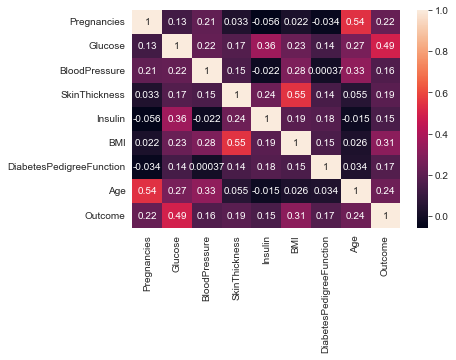

In [19]:
# the relations to determine the effective columns
map = df.corr()
sns.heatmap(map, annot=True)
plt.show()


In [20]:
# so we will remove the columns that don't affect on diabetes
print("The new Dataset after removing non effecting columns on diabetes from the heatmap: ")
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')
print(df_selected)
print("===========================================================")


The new Dataset after removing non effecting columns on diabetes from the heatmap: 
     Pregnancies  Glucose  SkinThickness   BMI  Age  Outcome
0              6    148.0             35  33.6   50        1
1              1     85.0             29  26.6   31        0
2              8    183.0             23  23.3   32        1
3              1     89.0             23  28.1   21        0
4              0    137.0             35  43.1   33        1
..           ...      ...            ...   ...  ...      ...
763           10    101.0             48  32.9   63        0
764            2    122.0             27  36.8   27        0
765            5    121.0             23  26.2   30        0
766            1    126.0             23  30.1   47        1
767            1     93.0             31  30.4   23        0

[768 rows x 6 columns]


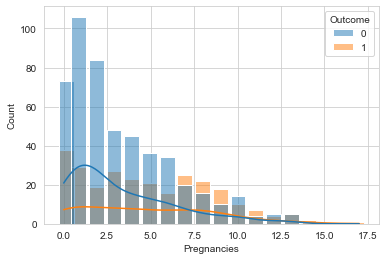

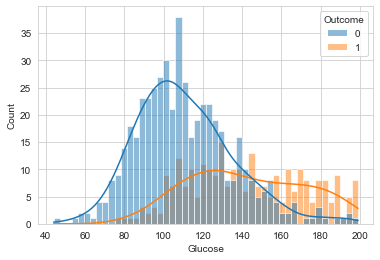

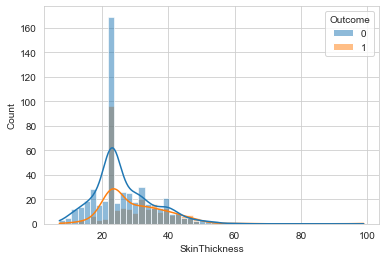

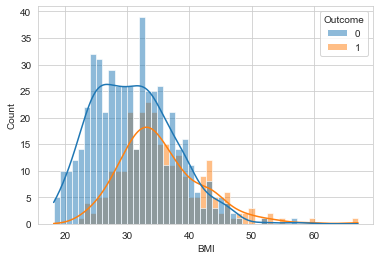

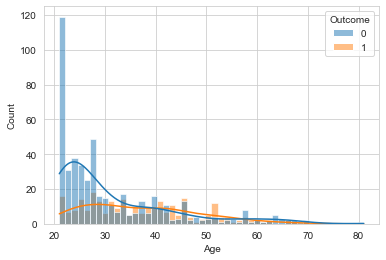

In [21]:
# graph for relation between each column and outcome
sns.histplot(data=df_selected,x=df_selected['Pregnancies'],hue=df_selected['Outcome'],bins=50,kde=True,shrink=2.5)
plt.show()
sns.histplot(data=df_selected,x=df_selected['Glucose'],hue=df_selected['Outcome'],bins=50,kde=True)
plt.show()
sns.histplot(data=df_selected,x=df_selected['SkinThickness'],hue=df_selected['Outcome'],bins=50,kde=True)
plt.show()
sns.histplot(data=df_selected,x=df_selected['BMI'],hue=df_selected['Outcome'],bins=50,kde=True)
plt.show()
sns.histplot(data=df_selected,x=df_selected['Age'],hue=df_selected['Outcome'],bins=50,kde=True)
plt.show()



In [22]:
# split the dataset into X and Y

#given predictions - training data
Y= df_selected['Outcome']
print("The Outcome data: ")
print(Y.head()) #contains dependent feature
print("===========================================================")



The Outcome data: 
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [23]:
#dropping the Outcome column and keeping all other columns as X
X=df_selected.drop('Outcome',axis=1)
print("Dataset without Outcome: ")
print(X.head()) # contains only independent features
print("===========================================================")


Dataset without Outcome: 
   Pregnancies  Glucose  SkinThickness   BMI  Age
0            6    148.0             35  33.6   50
1            1     85.0             29  26.6   31
2            8    183.0             23  23.3   32
3            1     89.0             23  28.1   21
4            0    137.0             35  43.1   33


In [24]:
# Normalize the data X
#the QuantileTransformer is a useful tool for transforming data to a standard scale and distribution,
#which can improve the performance of machine learning algorithms
#that are sensitive to the scale and distribution of the input features.
Quantile  = QuantileTransformer()
Quantile.fit_transform(X)
df_new =Quantile.transform(X)
X=df_new
print("The Data X after Normalization: ")
print(X)
print("===========================================================")



The Data X after Normalization: 
[[0.74771838 0.81029987 0.80182529 0.59126467 0.88983051]
 [0.2327249  0.09126467 0.64471969 0.21316819 0.55867014]
 [0.86375489 0.95697523 0.35788787 0.07757497 0.58539765]
 ...
 [0.6779661  0.54954368 0.35788787 0.1988266  0.52933507]
 [0.2327249  0.61994785 0.35788787 0.38591917 0.86701434]
 [0.2327249  0.17079531 0.70273794 0.39895698 0.20013038]]


In [25]:
#put the normalized data in a data frame
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age']
print("The Data X: ")
print(df_new.head())
print("===========================================================")



The Data X: 
   Pregnancies   Glucose  SkinThickness       BMI       Age
0     0.747718  0.810300       0.801825  0.591265  0.889831
1     0.232725  0.091265       0.644720  0.213168  0.558670
2     0.863755  0.956975       0.357888  0.077575  0.585398
3     0.232725  0.124511       0.357888  0.284224  0.000000
4     0.000000  0.721643       0.801825  0.926988  0.606258


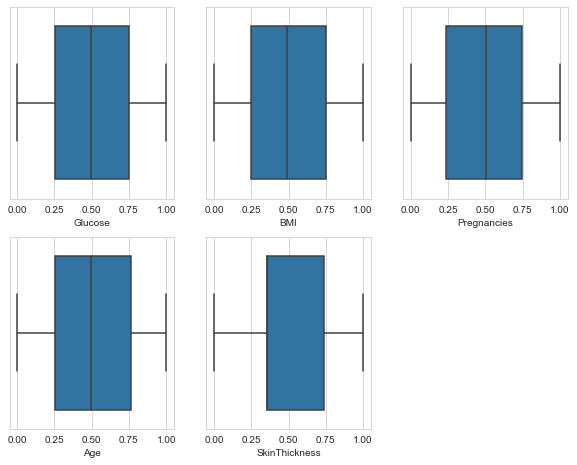

In [26]:
# plot each column in the data after normalization
plt.figure(figsize=(10,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)
plt.show()


In [27]:
#The train-test split is a technique for evaluating the performance of a machine learning algorithm.
#splitting data in 80% train, 20%test
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print('Training Set - X:', X_train.shape, 'y:', Y_train.shape)
print('Testing Set - X:', X_test.shape, 'y:', Y_test.shape)
print("===========================================================")



Training Set - X: (614, 5) y: (614,)
Testing Set - X: (154, 5) y: (154,)


In [28]:
# Train and evaluate a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred_tree= tree.predict(X_test)
accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
print('Decision Tree - Accuracy_tree:', accuracy_tree)



Decision Tree - Accuracy_tree: 0.6103896103896104


In [29]:
# Train and evaluate a random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_pred_random= forest.predict(X_test)
accuracy_random = accuracy_score(Y_test, Y_pred_random)
print('Random Forest - Accuracy_random:', accuracy_random)




Random Forest - Accuracy_random: 0.7077922077922078


In [30]:
# Train and evaluate a Vector Machine Classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
Y_pred_class= classifier.predict(X_test)
accuracy_class = accuracy_score(Y_test, Y_pred_class)
print('Vector Machine Classifier - Accuracy_random:', accuracy_class)
print("===========================================================")


Vector Machine Classifier - Accuracy_random: 0.7532467532467533


In [33]:
# Select the best performing model
if accuracy_random > accuracy_tree and accuracy_random > accuracy_class:
    print('Random Forest is the best performing model.')
    print('Accuracy_random:', accuracy_random)
    print('Precision:', precision_score(Y_test, Y_pred_random))
    print('Recall:', recall_score(Y_test, Y_pred_random))
    print('F1_Score:', f1_score(Y_test, Y_pred_random))
    model = forest
    # compute the confusion matrix
    cm = confusion_matrix(Y_test, Y_pred_random)
    print("The Confusion Matrix = ",cm)
elif accuracy_class > accuracy_tree and accuracy_class > accuracy_random:
    print('Vector Machine Classifier is the best performing model.')
    print('Accuracy_random:', accuracy_class)
    print('Precision:', precision_score(Y_test, Y_pred_class))
    print('Recall:', recall_score(Y_test, Y_pred_class))
    print('F1_Score:', f1_score(Y_test, Y_pred_class))
    model = classifier
    # compute the confusion matrix
    cm = confusion_matrix(Y_test, Y_pred_class)
    print("The Confusion Matrix = ",cm)
else:
    print('Decision Tree is the best performing model.')
    print('Accuracy_random:', accuracy_tree)
    print('Precision:', precision_score(Y_test, Y_pred_tree))
    print('Recall:', recall_score(Y_test, Y_pred_tree))
    print('F1_Score:', f1_score(Y_test, Y_pred_tree))
    model = tree
    # compute the confusion matrix
    cm = confusion_matrix(Y_test, Y_pred_tree)
    print("The Confusion Matrix = ",cm)



Vector Machine Classifier is the best performing model.
Accuracy_random: 0.7532467532467533
Precision: 0.6904761904761905
Recall: 0.5370370370370371
F1_Score: 0.6041666666666667
The Confusion Matrix =  [[87 13]
 [25 29]]


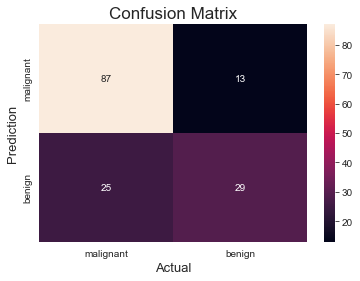

In [32]:
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g',
xticklabels=['malignant', 'benign'],
yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



In [35]:
# Evaluate the Predictive System

# Take the data from the user
P=int(input("Enter Number of Pregnancies : "))
G=int(input("Enter Value of Glucose Level : "))
S=int(input("Enter The Triceps Skin Thickness : "))
B=float(input("Enter The Value of Body Mass Index (BMI) : "))
A=int(input("Enter The Age : "))



Enter Number of Pregnancies : 5
Enter Value of Glucose Level : 52
Enter The Triceps Skin Thickness : 214
Enter The Value of Body Mass Index (BMI) : 136
Enter The Age : 252


In [36]:
# put the data in array and normalize it too like the data above and after that predict the answer from the selected model
input_data = (P,G,S,B,A)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
standard_data=Quantile.transform(input_data_reshaped)
prediction = model.predict(standard_data)
print("The Outcome is ",prediction)


The Outcome is  [0]


In [37]:
# Check from the prediction the value and print the state of the patient according to the prediction
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')



The person is not diabetic
